# My Spotify Behavior During the Last Year

#### Import Data and Libraries

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import downloading_and_cleaning as f

In [160]:
df_streaming = pd.read_csv('data/stream.csv')

# I listened to music the most on aftenoons at the beggining of the year

In [161]:
df_streaming.drop(columns=['Unnamed: 0'], inplace=True)
df_streaming['part_of_day'] = df_streaming.hour.apply(f.part_of_day)
df_streaming['quarter'] = df_streaming.month.apply(f.year_quarter)

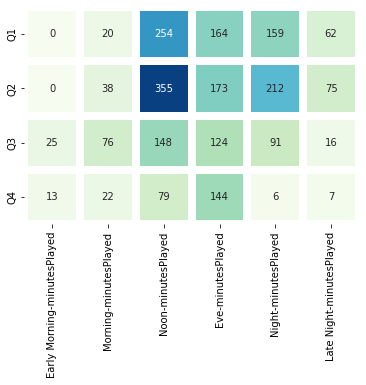

In [198]:
fig0 = df_streaming.groupby(['quarter', 'part_of_day']).agg({'minutesPlayed': 'sum'}).unstack().fillna(0).astype(int)
fig0.columns = fig0.columns.swaplevel(0, 1)
fig0.sort_index(axis=1, level=0, inplace=True)
fig0 = fig0[['Early Morning', 'Morning', 'Noon', 'Eve', 'Night', 'Late Night']]

ax = plt.axes()
sns.heatmap(fig0, annot=True, fmt='d', linewidth=8, 
            cmap="GnBu", ax=ax, cbar=False)
plt.xlabel("")
plt.ylabel("")
plt.show()

# My preferred music genre was punk rock and its variants

In [163]:
df_genres = df_streaming[['artist','genres','minutesPlayed']]
from ast import literal_eval
df_genres["genres"] = df_genres["genres"].apply(literal_eval)
df_genres = df_genres.explode("genres")

/var/folders/xv/v29gqxhs4b5gth_lvdz9tgl80000gn/T/ipykernel_11619/308039088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres["genres"] = df_genres["genres"].apply(literal_eval)


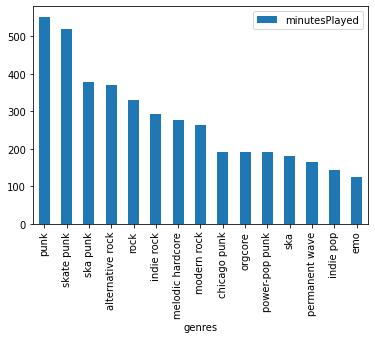

In [164]:
fig2 = df_genres.groupby(['genres']).agg({'minutesPlayed': 'sum'}).fillna(0).astype(int)
fig2 = fig2.sort_values(by='minutesPlayed',ascending=False)
fig2.head(15).plot(kind='bar');

# Screeching Weasel and Rancid were my top plays

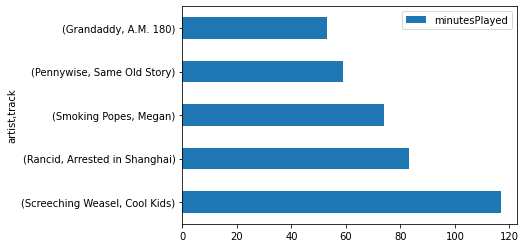

In [165]:
fig3 = df_streaming.groupby(['artist','track']).agg({'minutesPlayed': 'sum'}).fillna(0).astype(int)
fig3 = fig3.sort_values(by='minutesPlayed',ascending=False)
fig3.head(5).plot(kind='barh');

# Most of the songs I played lasted about 3 minutes

In [167]:
df_streaming1 = df_streaming.loc[(df_streaming['minutesPlayed']>1) & (df_streaming['minutesPlayed']<6)]

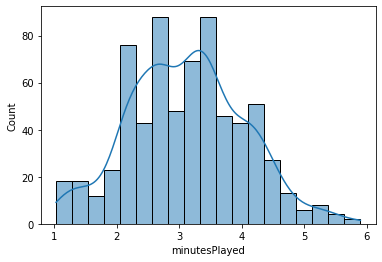

In [169]:
sns.histplot(x=df_streaming1.minutesPlayed, kde=True);

# The minutes played are difficult to attribute to a specific track feature 
### (no correllation)

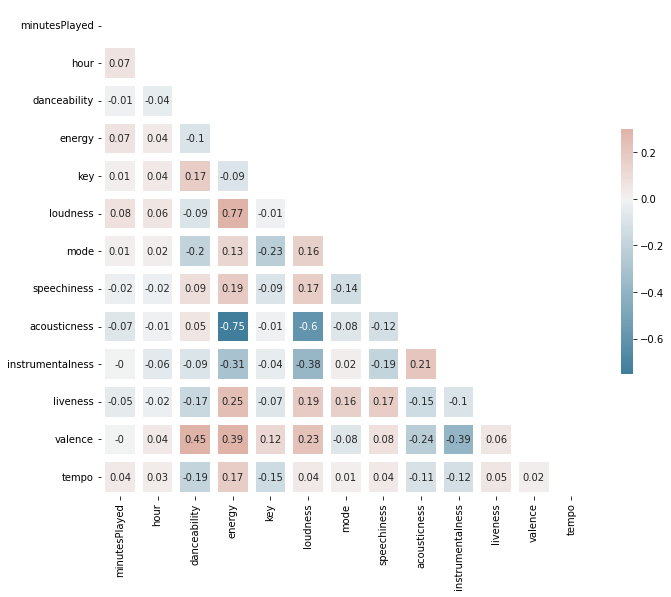

In [193]:
df_corr = df_streaming[['minutesPlayed', 'hour', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].corr().round(2)
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, square=True, linewidths=8, cbar_kws={"shrink": .5});

# Although digging a bit deeper, I found that 'danceability' and 'energy' might be the two main drivers that make me enjoy a song

In [168]:
attributes0 = ['danceability', 'energy', 'key']
attributes1 = ['loudness', 'acousticness', 'instrumentalness']
attributes2 = ['liveness', 'valence', 'tempo']

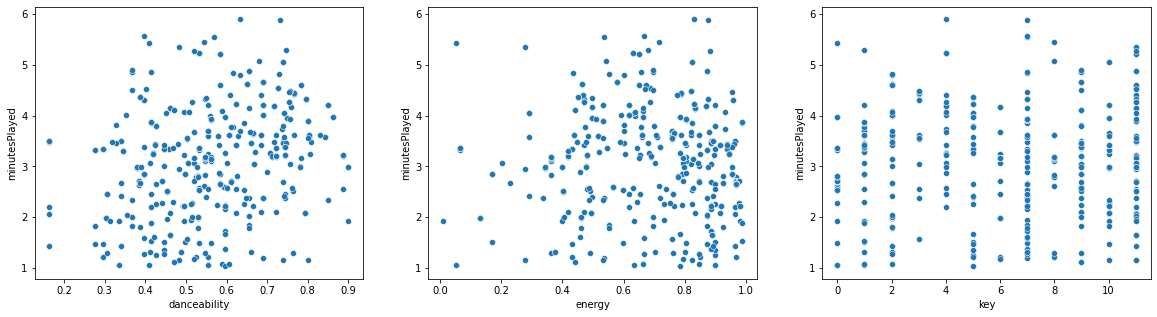

In [170]:
f.scatters(attributes0, "minutesPlayed", df_streaming1);

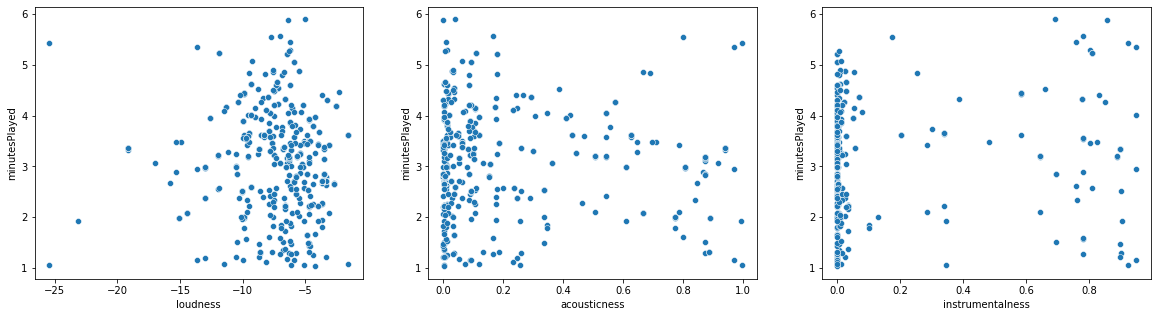

In [171]:
f.scatters(attributes1, "minutesPlayed", df_streaming1);

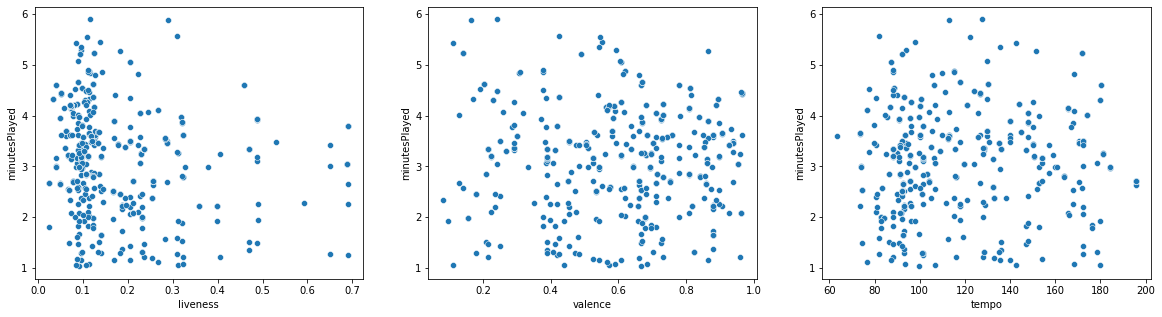

In [172]:
f.scatters(attributes2, "minutesPlayed", df_streaming1);

# Bringing it all together...

## If I were ...

### 1) The target of a Spotify campaign, I would focus the investment in the first half of the year
### 2) Receiving artists recommendations, I would offer punk vibes I haven't listened to yet
### 3) Being recommended new launches, I would welcome danceable and energetic short tracks


#### Note: for future exercises, I would complement this one with a factor analysis to understand track attributes better.